In [2]:
import numpy as np
import open3d as o3d

points = np.random.rand(30000, 3) * [1,2,3]
colors = np.random.rand(30000, 3)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(colors)


visualizer = o3d.visualization.Visualizer()
visualizer.create_window()
visualizer.add_geometry(pcd)
view_ctl = visualizer.get_view_control()

view_ctl.set_zoom(0.7)

view_ctl.set_up([1.0, 0.0, 0.0])

visualizer.update_renderer()
visualizer.run()


: 

Image saved to highest_points_image.png


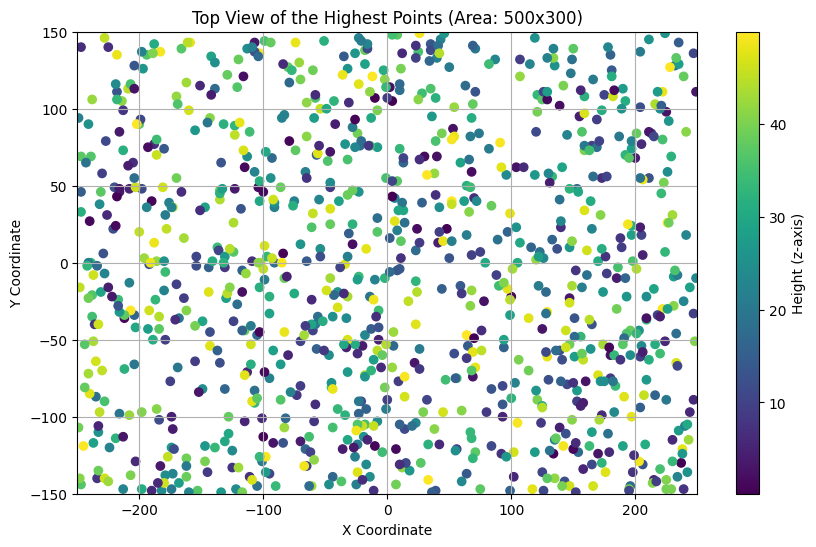

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_highest_points(point_cloud, x_range=500, y_range=300, save_path=None):
    filtered_points = point_cloud[(point_cloud[:, 0] >= -x_range / 2) & (point_cloud[:, 0] <= x_range / 2) &
                                  (point_cloud[:, 1] >= -y_range / 2) & (point_cloud[:, 1] <= y_range / 2)]
    highest_points = {}
    for point in filtered_points:
        x, y, z = point
        key = (int(x), int(y))  
        if key not in highest_points or z > highest_points[key]:
            highest_points[key] = z 
    
    x_coords = []
    y_coords = []
    z_values = []

    for (x, y), z in highest_points.items():
        x_coords.append(x)
        y_coords.append(y)
        z_values.append(z)

    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords, y_coords, c=z_values, cmap='viridis', marker='o')
    plt.colorbar(label='Height (z-axis)')
    plt.title(f"Top View of the Highest Points (Area: {x_range}x{y_range})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.xlim(-x_range / 2, x_range / 2)
    plt.ylim(-y_range / 2, y_range / 2)
    plt.grid(True)

    if save_path:
        plt.savefig(save_path)
        print(f"Image saved to {save_path}")
    # plt.show()

point_cloud = np.random.rand(1000, 3) * np.array([500, 300, 50]) - np.array([250, 150, 0])
visualize_highest_points(point_cloud, x_range=500, y_range=300, save_path='highest_points_image.png')
